In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf
import warnings
warnings.filterwarnings("ignore")

In [ ]:
delivery_time=pd.read_csv("C:/Users/mewit/Desktop/Data Science Notes/Assignmnets/Simple Linear Regression/delivery_time.csv")
delivery_time.head()

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10


In [ ]:
# Renamin the colume
dt = delivery_time.rename({'Delivery Time':'delivery_time','Sorting Time': 'sorting_time'}, axis=1)
dt

,delivery_time,sorting_time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


In [ ]:
# Checking for Number of rows and columsn
dt.shape

(21, 2)

In [ ]:
# Checking the Data Types
dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   delivery_time  21 non-null     float64
 1   sorting_time   21 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 464.0 bytes


In [ ]:
# Checking for null values
dt.isna().sum()

delivery_time    0
sorting_time     0
dtype: int64

In [ ]:
# Checking for duplicate values
dt['delivery_time'].duplicated().sum()

0

{'whiskers': [<matplotlib.lines.Line2D at 0x21533d4a400>,
 'caps': [<matplotlib.lines.Line2D at 0x21533d4a9a0>,
 'boxes': [<matplotlib.lines.Line2D at 0x21533d4a130>,
 'medians': [<matplotlib.lines.Line2D at 0x21533d4af40>,
 'fliers': [<matplotlib.lines.Line2D at 0x215343fc250>,
 'means': []}

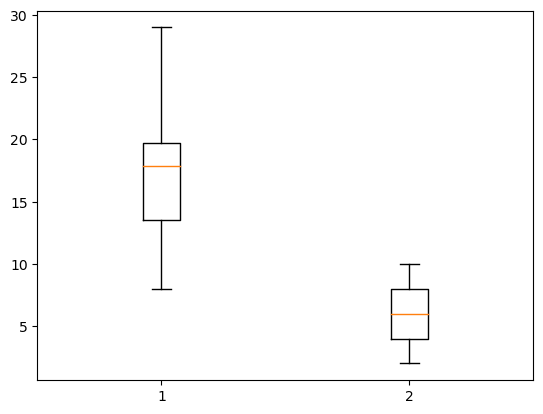

In [ ]:
# Checking for outliers
plt.boxplot(dt)

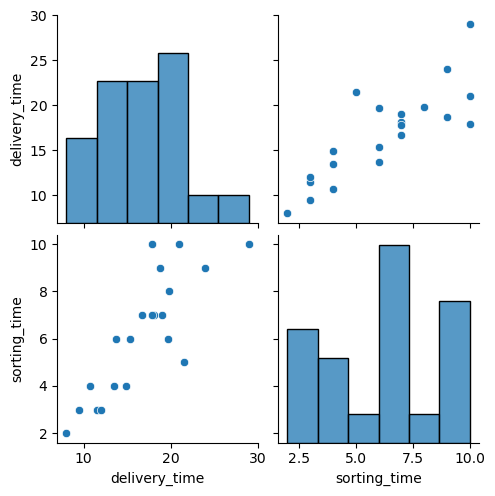

In [ ]:
# Plotting a pair plot
sns.pairplot(dt)

In [ ]:
# Checking the correlation
dt.corr()

,delivery_time,sorting_time
delivery_time,1.000000,0.825997
sorting_time,0.825997,1.000000


<AxesSubplot:xlabel='delivery_time', ylabel='Density'>

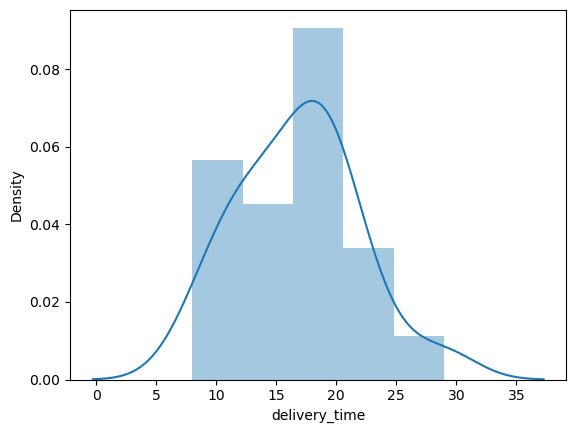

In [ ]:
sns.distplot(dt['delivery_time'])

<AxesSubplot:xlabel='sorting_time', ylabel='Density'>

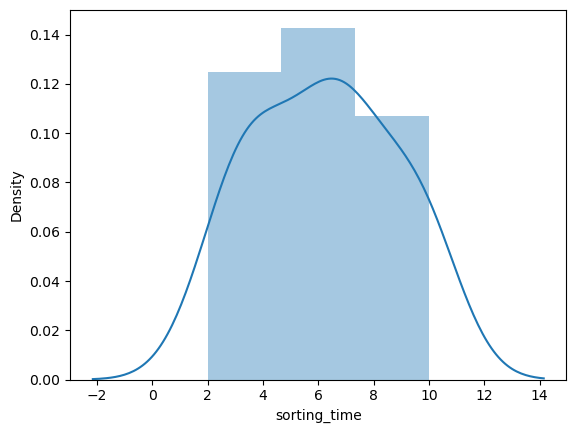

In [ ]:
sns.distplot(dt['sorting_time'])

# Model Creation

In [ ]:
model=smf.ols("delivery_time~sorting_time",data = dt).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          delivery_time   R-squared:                       0.682
Model:                            OLS   Adj. R-squared:                  0.666
Method:                 Least Squares   F-statistic:                     40.80
Date:                Wed, 18 Jan 2023   Prob (F-statistic):           3.98e-06
Time:                        22:59:45   Log-Likelihood:                -51.357
No. Observations:                  21   AIC:                             106.7
Df Residuals:                      19   BIC:                             108.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        6.5827      1.722      3.823      0.001       2.979      10.186
sorting_time     1.6490      0.258      6.387      0.000       1.109       2.189
==============================================================================
Omnibus:                        3.649   Durbin-Watson:                   1.248
Prob(Omnibus):                  0.161   Jarque-Bera (JB):                2.086
Skew:                           0.750   Prob(JB):                        0.352
Kurtosis:                       3.367   Cond. No.                         18.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
model1=smf.ols("delivery_time~np.log(sorting_time)", data = dt).fit()
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          delivery_time   R-squared:                       0.695
Model:                            OLS   Adj. R-squared:                  0.679
Method:                 Least Squares   F-statistic:                     43.39
Date:                Wed, 18 Jan 2023   Prob (F-statistic):           2.64e-06
Time:                        22:59:45   Log-Likelihood:                -50.912
No. Observations:                  21   AIC:                             105.8
Df Residuals:                      19   BIC:                             107.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept                1.1597      2.455      0.472      0.642      -3.978       6.297
np.log(sorting_time)     9.0434      1.373      6.587      0.000       6.170      11.917
==============================================================================
Omnibus:                        5.552   Durbin-Watson:                   1.427
Prob(Omnibus):                  0.062   Jarque-Bera (JB):                3.481
Skew:                           0.946   Prob(JB):                        0.175
Kurtosis:                       3.628   Cond. No.                         9.08
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
model2=smf.ols("np.log(delivery_time)~np.log(sorting_time)",data=dt).fit()
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                             
=================================================================================
Dep. Variable:     np.log(delivery_time)   R-squared:                       0.772
Model:                               OLS   Adj. R-squared:                  0.760
Method:                    Least Squares   F-statistic:                     64.39
Date:                   Wed, 18 Jan 2023   Prob (F-statistic):           1.60e-07
Time:                           22:59:45   Log-Likelihood:                 10.291
No. Observations:                     21   AIC:                            -16.58
Df Residuals:                         19   BIC:                            -14.49
Df Model:                              1                                         
Covariance Type:               nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept                1.7420      0.133     13.086      0.000       1.463       2.021
np.log(sorting_time)     0.5975      0.074      8.024      0.000       0.442       0.753
==============================================================================
Omnibus:                        1.871   Durbin-Watson:                   1.322
Prob(Omnibus):                  0.392   Jarque-Bera (JB):                1.170
Skew:                           0.577   Prob(JB):                        0.557
Kurtosis:                       2.916   Cond. No.                         9.08
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
model3=smf.ols("np.log(delivery_time)~np.square(sorting_time)",data=dt).fit()
model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                             
=================================================================================
Dep. Variable:     np.log(delivery_time)   R-squared:                       0.621
Model:                               OLS   Adj. R-squared:                  0.601
Method:                    Least Squares   F-statistic:                     31.18
Date:                   Wed, 18 Jan 2023   Prob (F-statistic):           2.20e-05
Time:                           23:27:02   Log-Likelihood:                 4.9564
No. Observations:                     21   AIC:                            -5.913
Df Residuals:                         19   BIC:                            -3.824
Df Model:                              1                                         
Covariance Type:               nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                   2.4290      0.076     32.014      0.000       2.270       2.588
np.square(sorting_time)     0.0078      0.001      5.584      0.000       0.005       0.011
==============================================================================
Omnibus:                        0.359   Durbin-Watson:                   1.494
Prob(Omnibus):                  0.836   Jarque-Bera (JB):                0.004
Skew:                           0.033   Prob(JB):                        0.998
Kurtosis:                       3.000   Cond. No.                         94.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
model4=smf.ols("np.square(delivery_time)~np.square(sorting_time)",data=dt).fit()
model4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               OLS Regression Results                               
====================================================================================
Dep. Variable:     np.square(delivery_time)   R-squared:                       0.588
Model:                                  OLS   Adj. R-squared:                  0.567
Method:                       Least Squares   F-statistic:                     27.14
Date:                      Wed, 18 Jan 2023   Prob (F-statistic):           4.99e-05
Time:                              23:28:30   Log-Likelihood:                -129.24
No. Observations:                        21   AIC:                             262.5
Df Residuals:                            19   BIC:                             264.6
Df Model:                                 1                                         
Covariance Type:                  nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                 114.1548     45.231      2.524      0.021      19.485     208.825
np.square(sorting_time)     4.3239      0.830      5.209      0.000       2.587       6.061
==============================================================================
Omnibus:                        5.851   Durbin-Watson:                   1.224
Prob(Omnibus):                  0.054   Jarque-Bera (JB):                3.524
Skew:                           0.865   Prob(JB):                        0.172
Kurtosis:                       4.018   Cond. No.                         94.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
model5=smf.ols("np.square(np.log(delivery_time))~np.square(np.log(sorting_time))",data=dt).fit()
model5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                   OLS Regression Results                                   
============================================================================================
Dep. Variable:     np.square(np.log(delivery_time))   R-squared:                       0.728
Model:                                          OLS   Adj. R-squared:                  0.714
Method:                               Least Squares   F-statistic:                     50.94
Date:                              Wed, 18 Jan 2023   Prob (F-statistic):           8.74e-07
Time:                                      23:33:03   Log-Likelihood:                -27.099
No. Observations:                                21   AIC:                             58.20
Df Residuals:                                    19   BIC:                             60.29
Df Model:                                         1                                         
Covariance Type:                          nonrobust                                         
===================================================================================================
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
Intercept                           4.6788      0.481      9.725      0.000       3.672       5.686
np.square(np.log(sorting_time))     0.9752      0.137      7.137      0.000       0.689       1.261
==============================================================================
Omnibus:                        2.507   Durbin-Watson:                   1.275
Prob(Omnibus):                  0.285   Jarque-Bera (JB):                1.450
Skew:                           0.642   Prob(JB):                        0.484
Kurtosis:                       3.105   Cond. No.                         8.96
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
# Our model2 is performing well with
print("R_squared = ", model2.rsquared)

R_squared =  0.77216134926874
